In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df =  pd.read_csv(r"C:\Users\minis\OneDrive\Desktop\Pokemon\Pokemon.csv")
df.head(n=10)                  

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
df.columns = df.columns.str.upper().str.replace('_', '')
df.head()

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
print([col for col in df.columns if 'LEGENDARY' in col.upper()])

['LEGENDARY']


In [5]:
df[df['LEGENDARY'] == True].head(5)

,#,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [6]:
df = df.set_index('NAME') 

In [7]:
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

,#,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [8]:
print(df.columns.tolist())

['#', 'TYPE 1', 'TYPE 2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY']


In [9]:
df = df.drop(['TOTAL'], axis=1)

In [10]:
print('The columns of the dataset are: ',df.columns)
print('The shape of the dataframe is: ',df.shape) 

The columns of the dataset are:  Index(['#', 'TYPE 1', 'TYPE 2', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK',
       'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')
The shape of the dataframe is:  (800, 11)


In [11]:
df['TYPE 2'].fillna(df['TYPE 1'], inplace=True)

C:\Users\minis\AppData\Local\Temp\ipykernel_6244\2786597083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TYPE 2'].fillna(df['TYPE 1'], inplace=True)


In [12]:
print(df.loc['Bulbasaur'])     
print(df.iloc[0])              
print(df.iloc[0])              
print(df.loc['Kakuna']) 

#                  1
TYPE 1         Grass
TYPE 2        Poison
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
#                  1
TYPE 1         Grass
TYPE 2        Poison
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
#                  1
TYPE 1         Grass
TYPE 2        Poison
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
#                 14
TYPE 1           Bug
TYPE 2        Poison
HP                45
ATTACK            25
DEFENSE           50
SP. ATK           25
SP. DEF           25
SPEED             35
GENERATION         1
LEGE

In [13]:
df[((df['TYPE 1']=='Fire') | (df['TYPE 1']=='Dragon')) & ((df['TYPE 2']=='Dragon') | (df['TYPE 2']=='Fire'))].head(3)

,#,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Charmander,4,Fire,Fire,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,Fire,58,64,58,80,65,80,1,False
CharizardMega Charizard X,6,Fire,Dragon,78,130,111,130,85,100,1,False


In [14]:
print("MAx HP:",df['HP'].argmax())
print("Max DEFENCE:",(df['DEFENSE']).idxmax())

MAx HP: 261
Max DEFENCE: SteelixMega Steelix


In [15]:
print(df.columns.tolist())

['#', 'TYPE 1', 'TYPE 2', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED', 'GENERATION', 'LEGENDARY']


In [16]:
df.sort_values('#', ascending=False)

,#,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Volcanion,721,Fire,Water,80,110,120,130,90,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,80,160,60,170,130,80,6,True
HoopaHoopa Confined,720,Psychic,Ghost,80,110,60,150,130,70,6,True
DiancieMega Diancie,719,Rock,Fairy,50,160,110,160,110,110,6,True
Diancie,719,Rock,Fairy,50,100,150,100,150,50,6,True
...,...,...,...,...,...,...,...,...,...,...,...
Charmander,4,Fire,Fire,39,52,43,60,50,65,1,False
Venusaur,3,Grass,Poison,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,80,100,123,122,120,80,1,False


In [17]:
print('The unique  pokemon types are',df['TYPE 1'].unique())
print('The number of unique types are',df['TYPE 1'].nunique())

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [18]:
print(df['TYPE 1'].value_counts(), '\n' ,df['TYPE 2'].value_counts())
df.groupby(['TYPE 1']).size()  
(df['TYPE 1']=='Bug').sum()

TYPE 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64 
 TYPE 2
Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: count, dtype: int64


69

In [19]:
df_summary = df.describe()
df_summary

,#,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


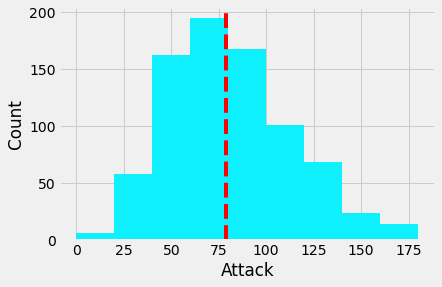

In [20]:
bins=range(0,200,20) 
plt.hist(df["ATTACK"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Attack') 
plt.ylabel('Count') 
plt.plot()
plt.axvline(df['ATTACK'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

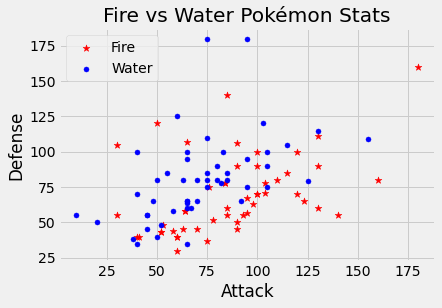

In [21]:
fire = df[(df['TYPE 1'] == 'Fire') | (df['TYPE 2'] == 'Fire')]
water = df[(df['TYPE 1'] == 'Water') | (df['TYPE 2'] == 'Water')]

import matplotlib.pyplot as plt

plt.scatter(fire.ATTACK.head(50), fire.DEFENSE.head(50), color='r', label='Fire', marker="*", s=50)
plt.scatter(water.ATTACK.head(50), water.DEFENSE.head(50), color='b', label='Water', s=25)

plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Fire vs Water Pokémon Stats")
plt.legend()
plt.show()

In [22]:
strong=df.sort_values(by='#', ascending=False)
strong.drop_duplicates(subset=['TYPE 1'],keep='first') 

,#,TYPE 1,TYPE 2,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Volcanion,721,Fire,Water,80,110,120,130,90,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,80,160,60,170,130,80,6,True
DiancieMega Diancie,719,Rock,Fairy,50,160,110,160,110,110,6,True
Zygarde50% Forme,718,Dragon,Ground,108,100,121,81,95,95,6,True
Yveltal,717,Dark,Flying,126,131,95,131,98,99,6,True
Xerneas,716,Fairy,Fairy,126,131,95,131,98,99,6,True
Noivern,715,Flying,Dragon,85,70,80,97,80,123,6,False
Avalugg,713,Ice,Ice,95,117,184,44,46,28,6,False
GourgeistSuper Size,711,Ghost,Grass,85,100,122,58,75,54,6,False


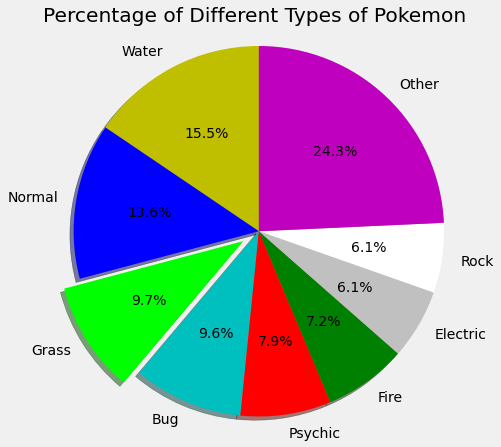

In [23]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['y', 'b', '#00ff00', 'c', 'r', 'g', 'silver', 'white', 'm']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

In [24]:
df2 = df.drop(['GENERATION', '#'], axis=1)
print(type(df2))
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
                      TYPE 1  TYPE 2  HP  ATTACK  DEFENSE  SP. ATK  SP. DEF  \
NAME                                                                          
Bulbasaur              Grass  Poison  45      49       49       65       65   
Ivysaur                Grass  Poison  60      62       63       80       80   
Venusaur               Grass  Poison  80      82       83      100      100   
VenusaurMega Venusaur  Grass  Poison  80     100      123      122      120   
Charmander              Fire    Fire  39      52       43       60       50   

                       SPEED  LEGENDARY  
NAME                                     
Bulbasaur                 45      False  
Ivysaur                   60      False  
Venusaur                  80      False  
VenusaurMega Venusaur     80      False  
Charmander                65      False  


In [25]:
df_melted = df.melt(id_vars=['TYPE 1', 'TYPE 2'],  # adjust based on your columns
                    value_vars=['HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED'],
                    var_name='Stat', value_name='Value')

print(df_melted.dtypes)
print(df_melted['Value'].unique())

TYPE 1    object
TYPE 2    object
Stat      object
Value      int64
dtype: object
[ 45  60  80  39  58  78  44  59  79  50  40  65  63  83  30  55  35  75
  70  90  46  61  81  95  38  73 115 140  10  25  52 105  85 250  20 130
  48 160  41  91 106 100 125 190 255  28  68 150  31   1  64  84 104  72
 144 170 110  43  66  86  99  76  53  37  77  67  97 111  49  71 103  57
 108 135  74  69 120 116  62  54  36  51 114 165 109  89  92  56  88 123
 101  82  42 126  47 102   5 155 134  33 185 164  15  23 145 180  29  94
 136  93  24 112 132  98  27 117  87 147 124 129 128 107  22 121 131  34
 200 230  32 118 168 133 122 119 184 159 175 154 194  96 138 113 127]


In [26]:
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
df_melted = df_melted.dropna(subset=['Value'])

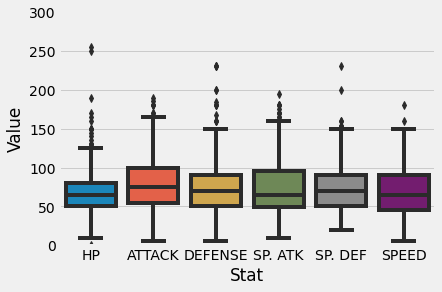

In [27]:
sns.boxplot(x='Stat', y='Value', data=df_melted)
plt.ylim(0, 300)
plt.show()

In [28]:
print(df2.columns.tolist())

['TYPE 1', 'TYPE 2', 'HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED', 'LEGENDARY']


In [29]:
df_melted = df2.melt(
    id_vars=['TYPE 1', 'TYPE 2', 'LEGENDARY'],
    value_vars=['HP', 'ATTACK', 'DEFENSE', 'SP. ATK', 'SP. DEF', 'SPEED'],
    var_name='Stat',
    value_name='Value'
)

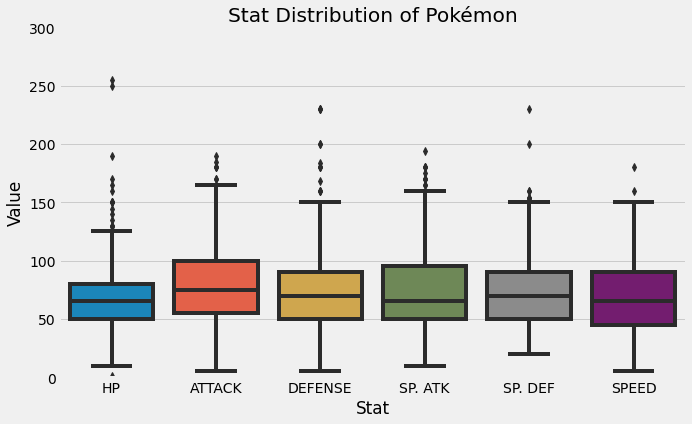

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stat', y='Value', data=df_melted)
plt.ylim(0, 300)
plt.title("Stat Distribution of Pokémon")
plt.show()

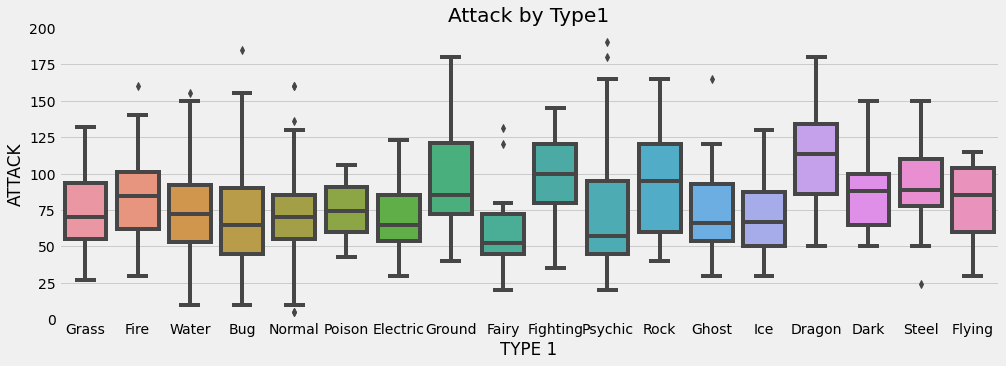

In [31]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type1')
sns.boxplot(x = "TYPE 1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

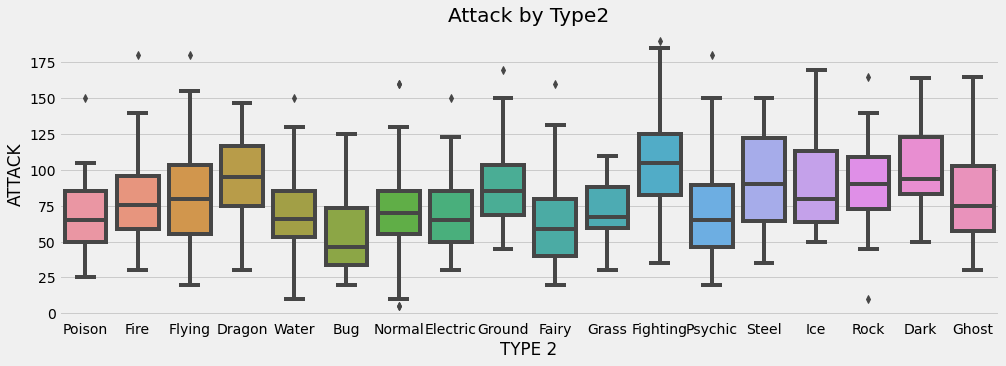

In [32]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type2')
sns.boxplot(x = "TYPE 2", y = "ATTACK",data=df)
plt.show()

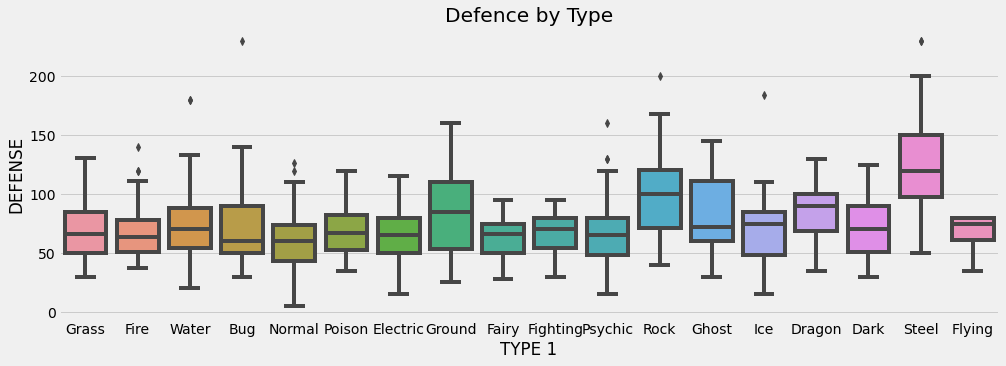

In [33]:
plt.subplots(figsize = (15,5))
plt.title('Defence by Type')
sns.boxplot(x = "TYPE 1", y = "DEFENSE",data = df)
plt.show()

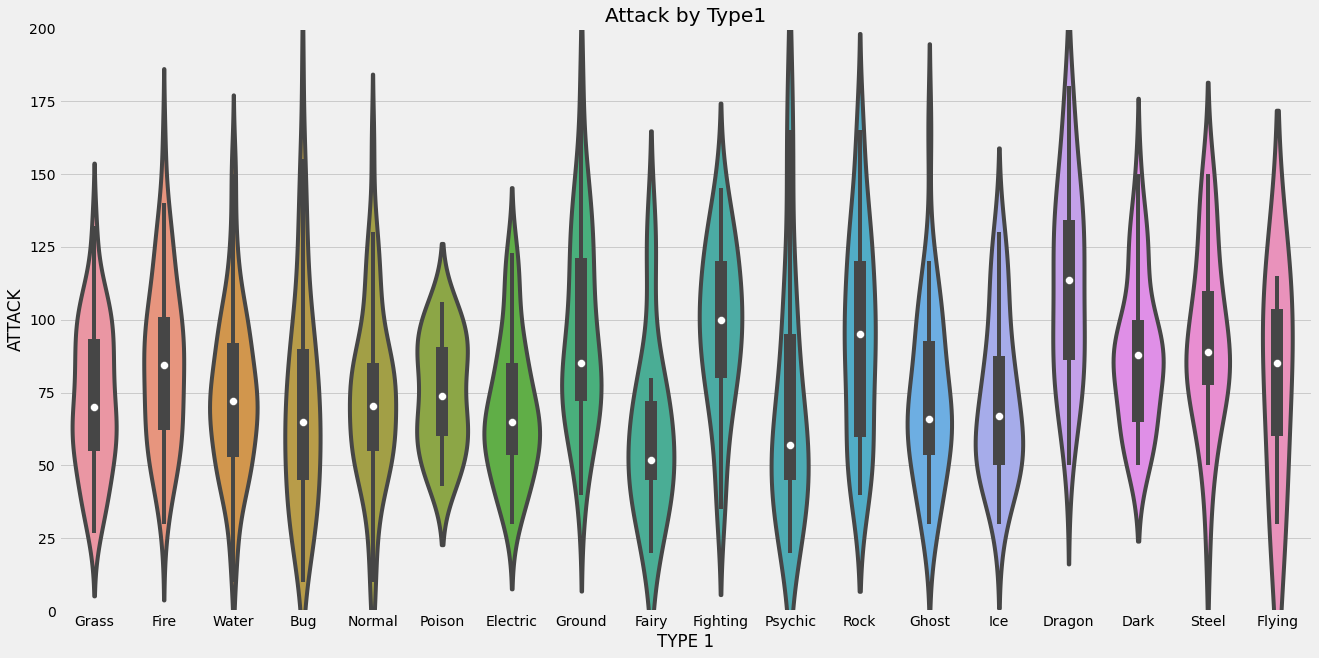

In [34]:
plt.subplots(figsize = (20,10))
plt.title('Attack by Type1')
sns.violinplot(x = "TYPE 1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

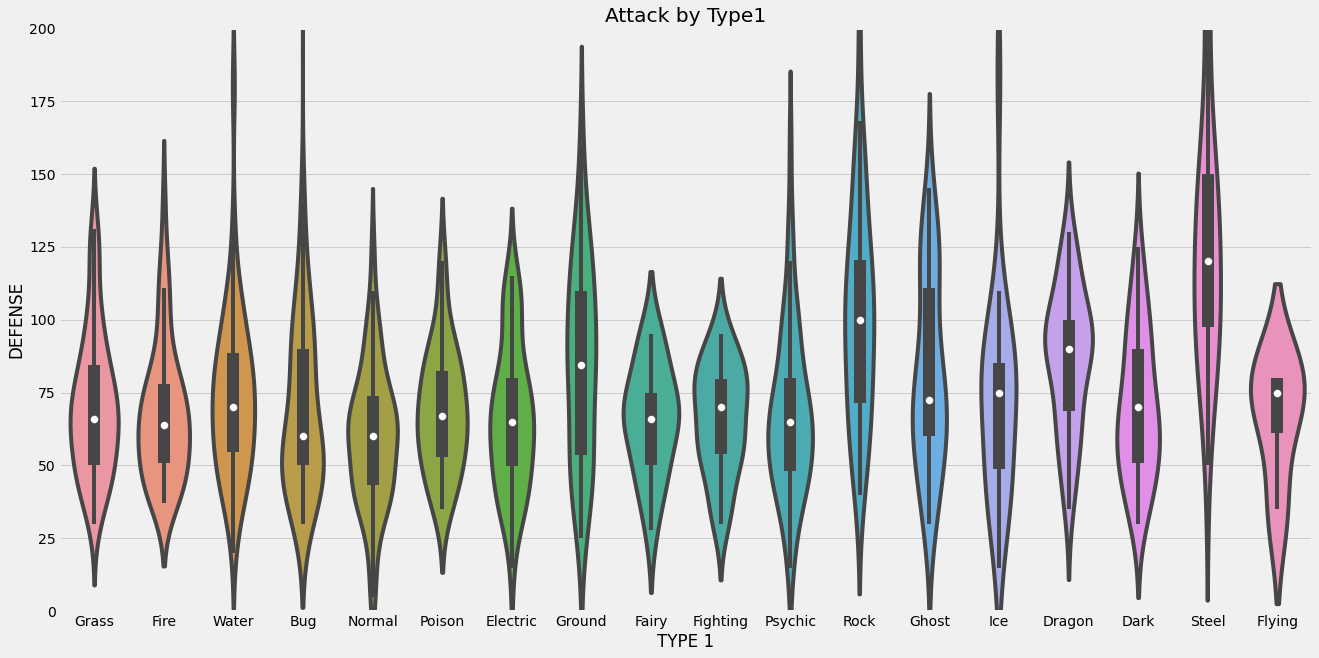

In [35]:
plt.subplots(figsize = (20,10))
plt.title('Attack by Type1')
sns.violinplot(x = "TYPE 1", y = "DEFENSE",data = df)
plt.ylim(0,200)
plt.show()

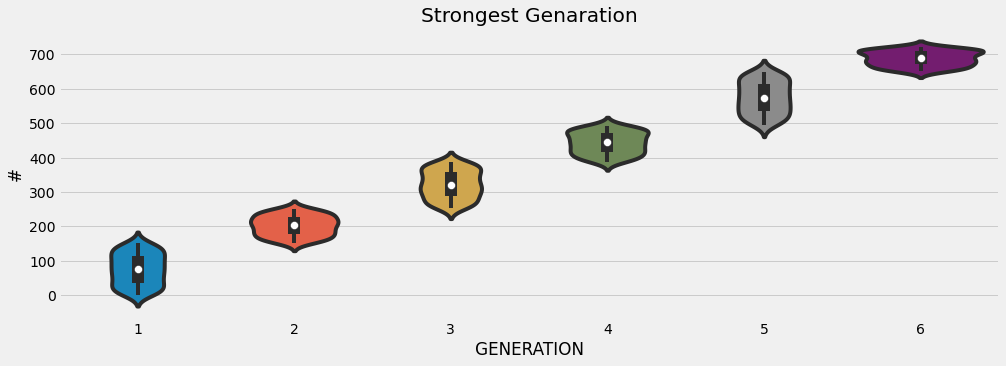

In [36]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "GENERATION", y = "#",data = df)
plt.show()

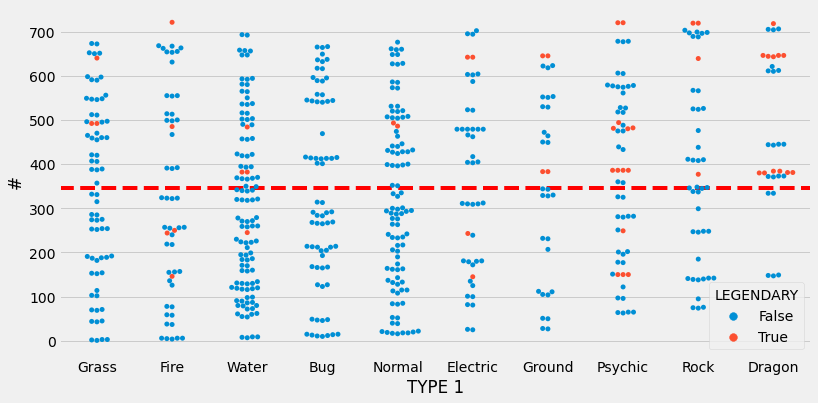

In [37]:
plt.figure(figsize=(12,6))
top_types=df['TYPE 1'].value_counts()[:10] 
df1=df[df['TYPE 1'].isin(top_types.index)] 
sns.swarmplot(x='TYPE 1',y='#',data=df1,hue='LEGENDARY') 
plt.axhline(df1['#'].mean(),color='red',linestyle='dashed')
plt.show()

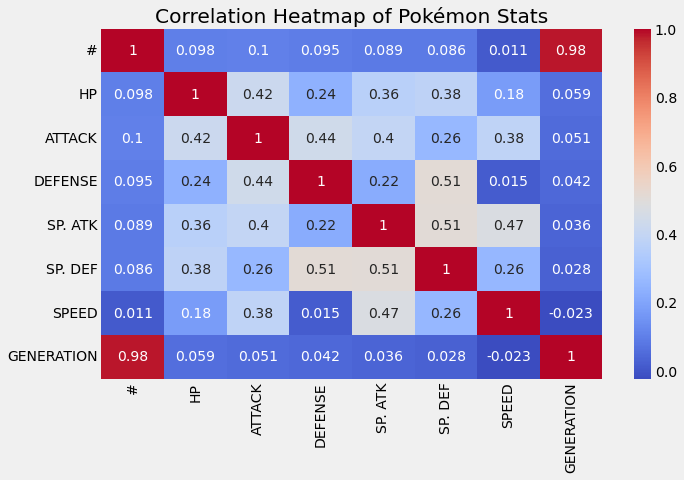

In [38]:
plt.figure(figsize=(10, 6))

numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Pokémon Stats")
plt.show()


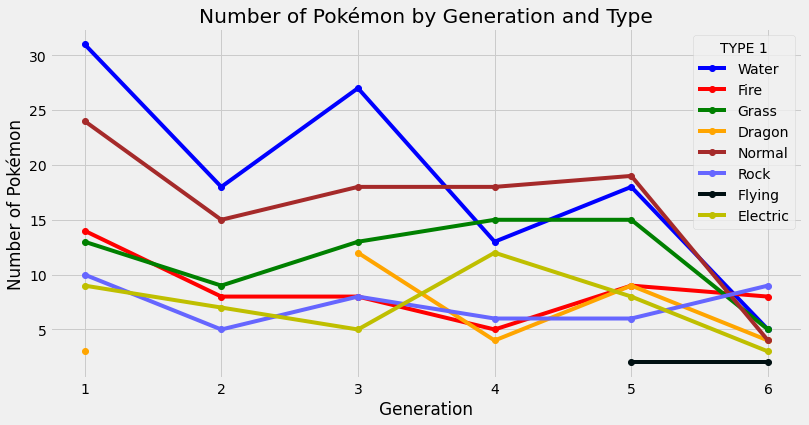

In [39]:
a = df.groupby(['GENERATION', 'TYPE 1']).count().reset_index()

a = a[['GENERATION', 'TYPE 1', '#']]

a = a.pivot(index='GENERATION', columns='TYPE 1', values='#')

types_to_plot = ['Water', 'Fire', 'Grass', 'Dragon', 'Normal', 'Rock', 'Flying', 'Electric']
colors = ['b', 'r', 'g', '#FFA500', 'brown', '#6666ff', '#001012', 'y']

a[types_to_plot].plot(color=colors, marker='o')

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.title('Number of Pokémon by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Number of Pokémon')
plt.grid(True)

plt.show()

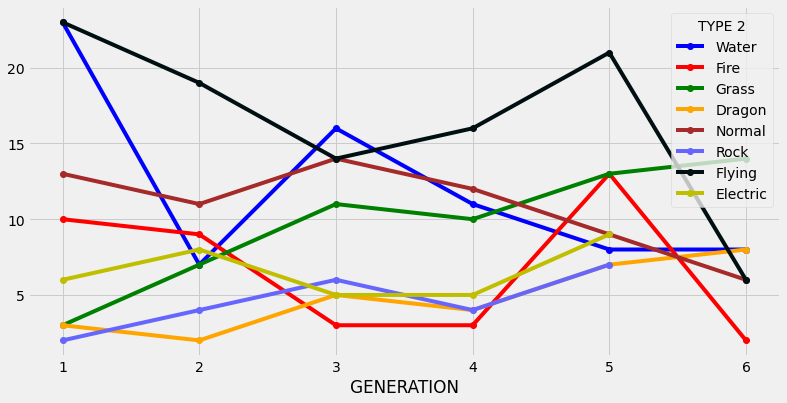

In [40]:
a = df.groupby(['GENERATION', 'TYPE 2']).count().reset_index()
a = a[['GENERATION', 'TYPE 2', '#']]
a = a.pivot(index='GENERATION', columns='TYPE 2', values='#')
a[['Water', 'Fire', 'Grass', 'Dragon', 'Normal', 'Rock', 'Flying', 'Electric']]\
    .plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'], marker='o')

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()